**NAMA: DIVA ANGGRAENI**

**NPM: 24083010065**

**MATEMATIKA DISKRIT (A)**

**PENUGASAN: Nilai Kumulatif**

**Senin, 22 September 2025**

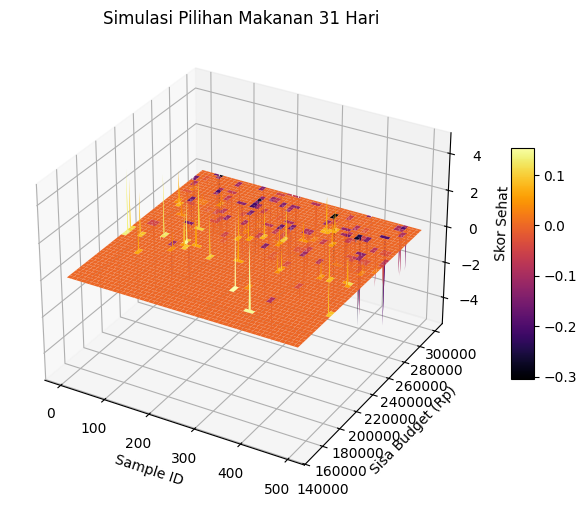

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 65
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")
# mohon ditambahkan (lagi) agar lebih beragam

budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 64), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0

    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*i]= pilihan

        # makan kedua
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*i+1]= pilihan

    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")

    idx = (budget - SISA_MININUM) / 1000
    if 0 <= idx < len(bin_sisa):
        resp_sehat[n][int(idx)] = skor_sehat

# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
# Colorize the surface using a colormap
surf = ax.plot_surface(X, Y, resp_sehat,
                       cmap='inferno',   # try 'plasma', 'coolwarm', etc.
                       edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.set_title("Simulasi Pilihan Makanan 31 Hari")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Budget (Rp)")
ax.set_zlabel("Skor Sehat")

plt.show()
# plot yang ini barangkali butuh dipercantik

# TUGAS
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

In [12]:
makan.head(16)

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


1. Cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif

In [13]:
hasil = []

for i in range(len(makan)):
  for j in range(i+1, len(makan)):
    sehat_total = makan.loc[i, "sehat"] + makan.loc[j, "sehat"] - 1
    if sehat_total > 0:
      hasil.append([makan.loc[i, "makanan"], makan.loc[j, "makanan"], sehat_total])

df_polapositif = pd.DataFrame(hasil, columns=["Makanan 1", "Makanan 2", "Skor Sehat"])
df_polapositif = df_polapositif.sort_values(by="Skor Sehat", ascending=True).reset_index(drop=True)

print ("Daftar Kombinasi Makanan Dengan Nilai Kumulatif Kesehatan Positif")
print("(Diurutkan Dari Skor Sehat Terkecil)")
df_polapositif

Daftar Kombinasi Makanan Dengan Nilai Kumulatif Kesehatan Positif
(Diurutkan Dari Skor Sehat Terkecil)


,Makanan 1,Makanan 2,Skor Sehat
0,ayamgeprek,mieayam,0.1
1,ayamgeprek,gacoan,0.1
2,nasipadang,bakso,0.1
3,nasipadang,roti,0.1
4,nasigoreng,nasi telur,0.1
5,gorengan,capcay,0.1
6,bakso,warteg,0.1
7,cireng,nasigoreng,0.1
8,seblak,capcay,0.1
9,nasigoreng,nasi bebek,0.1


**Penjelasan Kombinasi Makanan Dengan Nilai Kumulatif Kesehatan Positif**
> Output di atas menampilkan daftar kombinasi makanan yang memiliki nilai kumulatif kesehatan positif. Perhitungan nilai kumulatif dengan cara masing-masing nilai kesehatan dari kedua makanan dikurangi 0.5, lalu keduanya dijumlahkan, dan hasilnya disimpan pada kolom "Skor Sehat". Kombinasi makanan tersebut diurutkan berdasarkan skor sehat terkecil hingga terbesar. Semakin besar nilai "Skor Sehat", maka kombinasi makanan tersebut dianggap semakin memberikan kontribusi kesehatan yang lebih tinggi.

2. Cari titik-titik dengan sisa uang bulanan positif dari (1)

In [14]:
def hitung(row):
    h1 = makan.loc[makan["makanan"] == row["Makanan 1"], "harga"].values[0]
    h2 = makan.loc[makan["makanan"] == row["Makanan 2"], "harga"].values[0]
    per_hari = h1 + h2
    per_bulan = per_hari * 31
    sisa = 1_000_000 - per_bulan
    if sisa > 0:
        return pd.Series([
            f"{row['Makanan 1']} (Rp {h1:,.0f})",
            f"{row['Makanan 2']} (Rp {h2:,.0f})",
            f"Rp {per_hari:,.0f}",
            f"Rp {per_bulan:,.0f}",
            sisa
        ])

df_sisapositif = df_polapositif.apply(hitung, axis=1).dropna()
df_sisapositif.columns = ["Makanan 1","Makanan 2","Total per Hari","Total per Bulan","Sisa Uang"]


df_sisapositif = df_sisapositif.sort_values("Sisa Uang")
df_sisapositif["Sisa Uang"] = df_sisapositif["Sisa Uang"].apply(lambda x: f"Rp {x:,.0f}")

print("Kombinasi Makan Dengan Sisa Uang Bulanan Positif Berdasarkan Kombinasi Makanan Sehat")
print("(Diurutkan Dari Sisa Uang Terkecil)")
df_sisapositif

Kombinasi Makan Dengan Sisa Uang Bulanan Positif Berdasarkan Kombinasi Makanan Sehat
(Diurutkan Dari Sisa Uang Terkecil)


,Makanan 1,Makanan 2,Total per Hari,Total per Bulan,Sisa Uang
25,"ayamgeprek (Rp 15,000)","nasipadang (Rp 17,000)","Rp 32,000","Rp 992,000","Rp 8,000"
19,"nasipadang (Rp 17,000)","nasi bebek (Rp 15,000)","Rp 32,000","Rp 992,000","Rp 8,000"
39,"nasipadang (Rp 17,000)","capcay (Rp 15,000)","Rp 32,000","Rp 992,000","Rp 8,000"
35,"nasigoreng (Rp 14,000)","warteg (Rp 18,000)","Rp 32,000","Rp 992,000","Rp 8,000"
33,"nasipadang (Rp 17,000)","nasigoreng (Rp 14,000)","Rp 31,000","Rp 961,000","Rp 39,000"
30,"ayamgeprek (Rp 15,000)","capcay (Rp 15,000)","Rp 30,000","Rp 930,000","Rp 70,000"
26,"capcay (Rp 15,000)","nasi bebek (Rp 15,000)","Rp 30,000","Rp 930,000","Rp 70,000"
8,"seblak (Rp 15,000)","capcay (Rp 15,000)","Rp 30,000","Rp 930,000","Rp 70,000"
12,"ayamgeprek (Rp 15,000)","nasigoreng (Rp 14,000)","Rp 29,000","Rp 899,000","Rp 101,000"
38,"nasigoreng (Rp 14,000)","capcay (Rp 15,000)","Rp 29,000","Rp 899,000","Rp 101,000"


**Penjelasan Kombinasi Makanan Dengan Sisa Uang Bulanan Positif Dari Kombinasi Makanan Sehat**
> Output di atas menampilkan daftar kombinasi makanan yang tidak hanya memiliki nilai kumulatif kesehatan positif, namun masih menyisakan uang bulanan dari budget Rp 1.000.000. Perhitungannya dengan cara menjumlahkan harga kedua makanan sebagai total biaya per hari, kemudian dikalikan 31 untuk total biaya per bulan. Selanjutnya, sisa uang dihitung dari Rp 1.000.000 dikurangi total biaya per bulan. Kombinasi makanan hanya ditampilkan jika sisa uang masih positif. Daftar kombinasi makanan di atas diurutkan dari sisa uang terkecil hingga terbesar. Semakin besar nilai "Sisa Uang", maka semakin hemat kombinasi makanan tersebut terhadap budget bulanan.

3. Cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

In [15]:
skor_terbesar = df_polapositif[df_polapositif["Skor Sehat"] > 0].sort_values("Skor Sehat", ascending=False).head(1)

print("Titik Dengan Skor Kumulatif Terbesar (Positif):")
skor_terbesar

Titik Dengan Skor Kumulatif Terbesar (Positif):


,Makanan 1,Makanan 2,Skor Sehat
39,nasipadang,capcay,0.7


**Penjelasan Titik Dengan Skor Kumulatif Kesehatan (Positif) Terbesar**
> Output di atas menunjukkan kombinasi makanan yang memiliki skor kumulatif kesehatan terbesar dibandingkan kombinasi makanan dengan skor kesehatan positif yang lain. Semakin besar skor kumulatif, semakin baik kombinasi makanan tersebut dalam aspek kesehatan.

4. Tampikan jadwal makanan sesuai pilihan (resp_pilih)

In [16]:
print("Jadwal Makan Sesuai Pilihan (Sample 8):")
for hari in range (0, len(resp_pilih[8]), 2):
  m1 = makan.loc[resp_pilih[8][hari], "makanan"]
  m2 = makan.loc[resp_pilih[8][hari+1], "makanan"]
  print(f"Hari {hari//2 + 1}-> {m1} + {m2}")

Jadwal Makan Sesuai Pilihan (Sample 8):
Hari 1-> bakso + ayamgeprek
Hari 2-> nasi telur + nasi telur
Hari 3-> warteg + nasipadang
Hari 4-> nasi telur + warteg
Hari 5-> roti + nasi telur
Hari 6-> nasipadang + roti
Hari 7-> mi instan  + nasigoreng
Hari 8-> roti + gorengan
Hari 9-> nasigoreng + bakso
Hari 10-> ayamgeprek + nasigoreng
Hari 11-> roti + warteg
Hari 12-> warteg + nasi telur
Hari 13-> gacoan + seblak
Hari 14-> roti + cireng
Hari 15-> nasi bebek + nasipadang
Hari 16-> capcay + nasi telur
Hari 17-> ayamgeprek + warteg
Hari 18-> nasi telur + nasi telur
Hari 19-> mi instan  + nasipadang
Hari 20-> cireng + warteg
Hari 21-> nasigoreng + gacoan
Hari 22-> ayamgeprek + nasipadang
Hari 23-> mi instan  + nasigoreng
Hari 24-> mi instan  + nasi bebek
Hari 25-> gacoan + warteg
Hari 26-> roti + nasipadang
Hari 27-> mieayam + nasi bebek
Hari 28-> gacoan + cireng
Hari 29-> bakso + seblak
Hari 30-> roti + warteg
Hari 31-> capcay + bakso
Hari 32-> ayamgeprek + ayamgeprek


**Penjelasan Jadwal Makan Sesuai Pilihan**
> Jadwal makan yang saya pilih adalah sample 8 berdasarkan nilai indeks pada resp_pilih dan tanpa mempertimbangkan aspek apapun (tingkat kenyang hingga harga). Dalam satu bulan terdiri dari dua makanan untuk setiap harinya, sehingga pasangan indeks dibaca secara berurutan dua-dua. Dengan cara ini, jadwal makan lebih mudah dipahami karena langsung menunjukkan kombinasi makanan yang dikonsumsi tiap hari.